# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [150]:
import math
import sys

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

# from sklearn.preprocessing import StandardScaler

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [152]:
# YOUR CODE HERE

filepath = 'iris.tsv'

df = pd.read_csv(filepath, delimiter='\t')

YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [ ]:
# YOUR CODE HERE
columns = list(df.columns)
print(columns)

# Definitions #
"""
Sepal: Outer petals/leaves of flower that serve to protect the bud and support the petals post-bloom
Petal: Inner petals of flower that are often more colorful and delicate
"""

# Columns #
"""
sepal-length: The average length of the sepals of the Iris.
sepal-width: The average width of the sepals of the Iris.
petal-length: The average length of the petals of the Iris.
petal-width: The average width of the petals of the Iris.
target: Categorical column, most likely referring to the species of the Iris.
"""


['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'target']


YOUR ANSWERS HERE

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

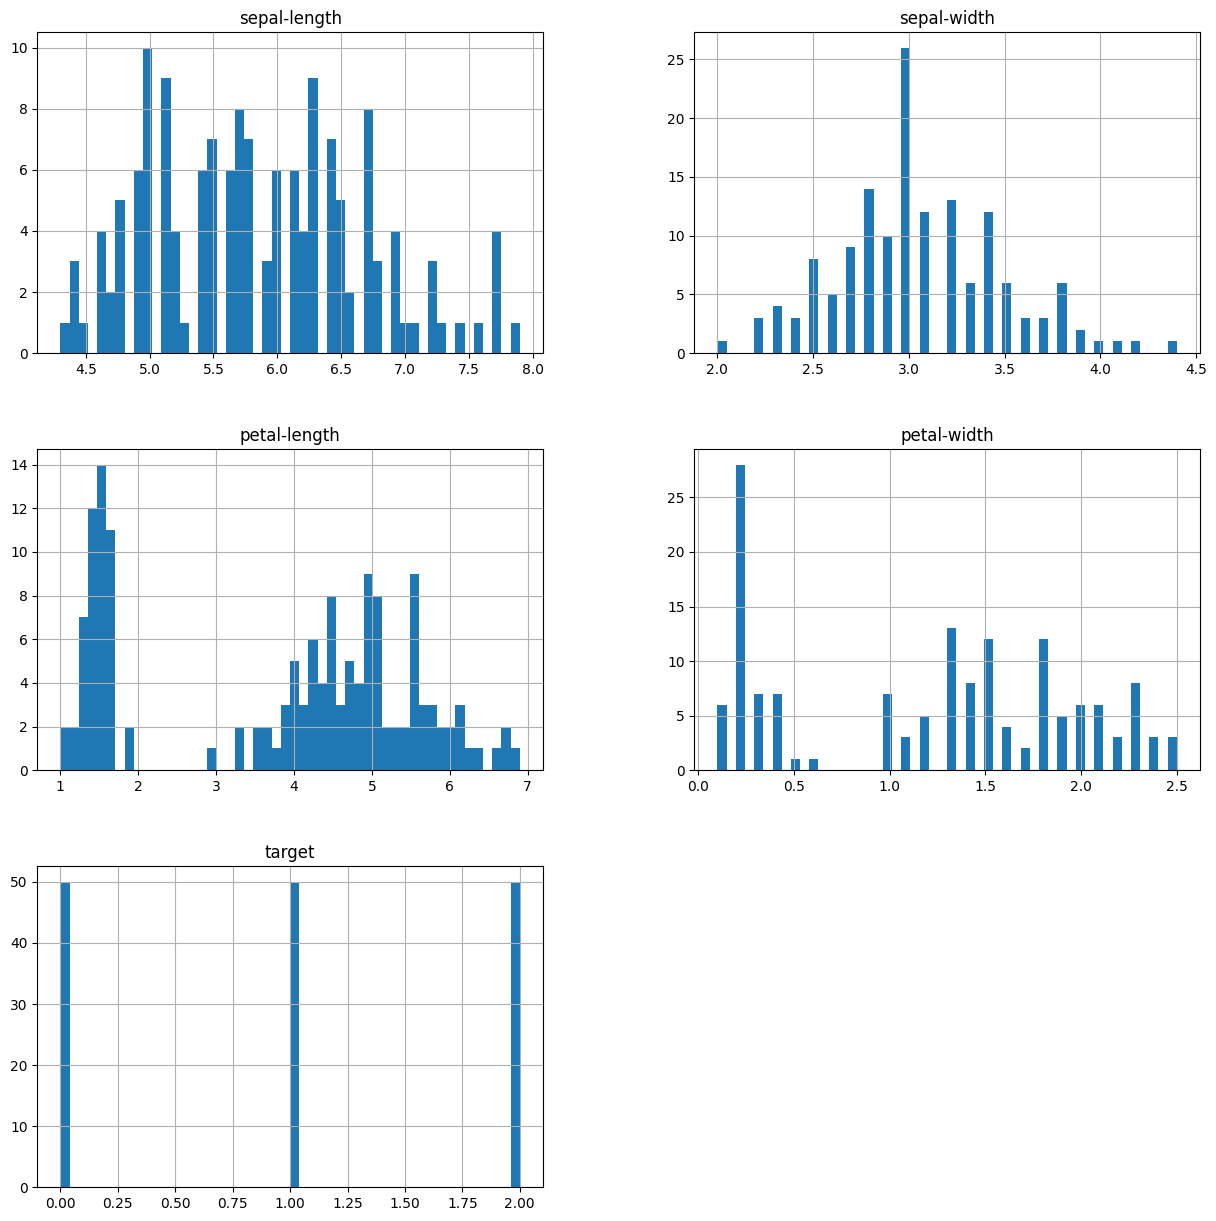

In [ ]:
# YOUR CODE HERE
df.hist(bins=50, figsize=(15, 15))

# Distributions #
"""
sepal-length: normal distribution (right skewed)
sepal-width: normal distribution
petal-length: bimodal distribution
petal-width: bimodal distribution
target: uniform distribution
"""

YOUR ANSWERS HERE

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

'\nTarget is dependent on pedal-width as well.\nThere are clear groupings, with some overlap between targets 1 and 2,\nbut overall clear enough delineations to suggest dependency.\nlower petal-width indicates target 0, middle petal-width indicates target 1,\nand larger petal-widths skew towards target 2.\n'

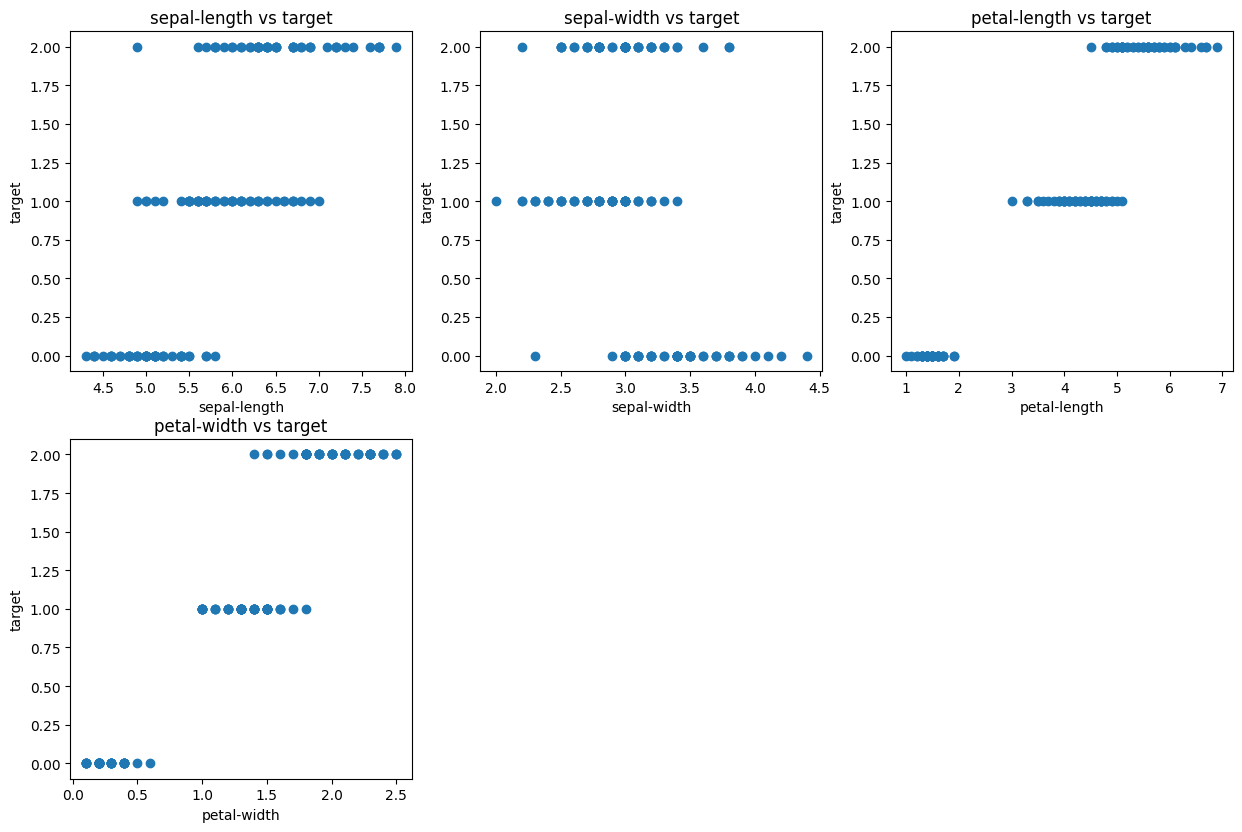

In [155]:
# YOUR CODE HERE

df_input = df.drop('target', axis=1)
df_output = df['target']

plt.figure(figsize=(15, 15))

for i, input_col in enumerate(df_input.columns, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[input_col], df_output)
    plt.xlabel(input_col)
    plt.ylabel('target')
    plt.title(f'{input_col} vs target')

plt.tight_layout
plt.show

## Dependent or Independent ##
# sepal-length #
"""
Target appears to be dependent on sepal-length.
I believe this to be the case due to the clear groupings seen in the scatter plot.
A small sepal-length skews toward of target 0, 
medium sepal length skews toward target 1,
and a large sepal length skews toward target 2.
"""
# sepal-width #
"""
sepal-width appears to be the weakest feature in terms of target dependency.
There is a large amount of overlap making it a weak overall candidate to try to base
a model around.
Visually it seems lower values skew toward target 1, medium values toward target 2, 
and larger values toward target 0, but the distinction is nowhere near as clear as other
input columns.
Overall I would say target is dependent on sepal-width, but only very weakly.
"""
# petal-length #
"""
Target is definitely dependent on petal-length.
There are clear grouping with very little overlap.
Lower petal-lengths indicate target 0, middle petal-lengths indicate target 1,
and larger petal-lengths indicate target 2.
"""
# petal-width #
"""
Target is dependent on pedal-width as well.
There are clear groupings, with some overlap between targets 1 and 2,
but overall clear enough delineations to suggest dependency.
lower petal-width indicates target 0, middle petal-width indicates target 1,
and larger petal-widths skew towards target 2.
"""

YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean Squared Error: 0.046385088311226945


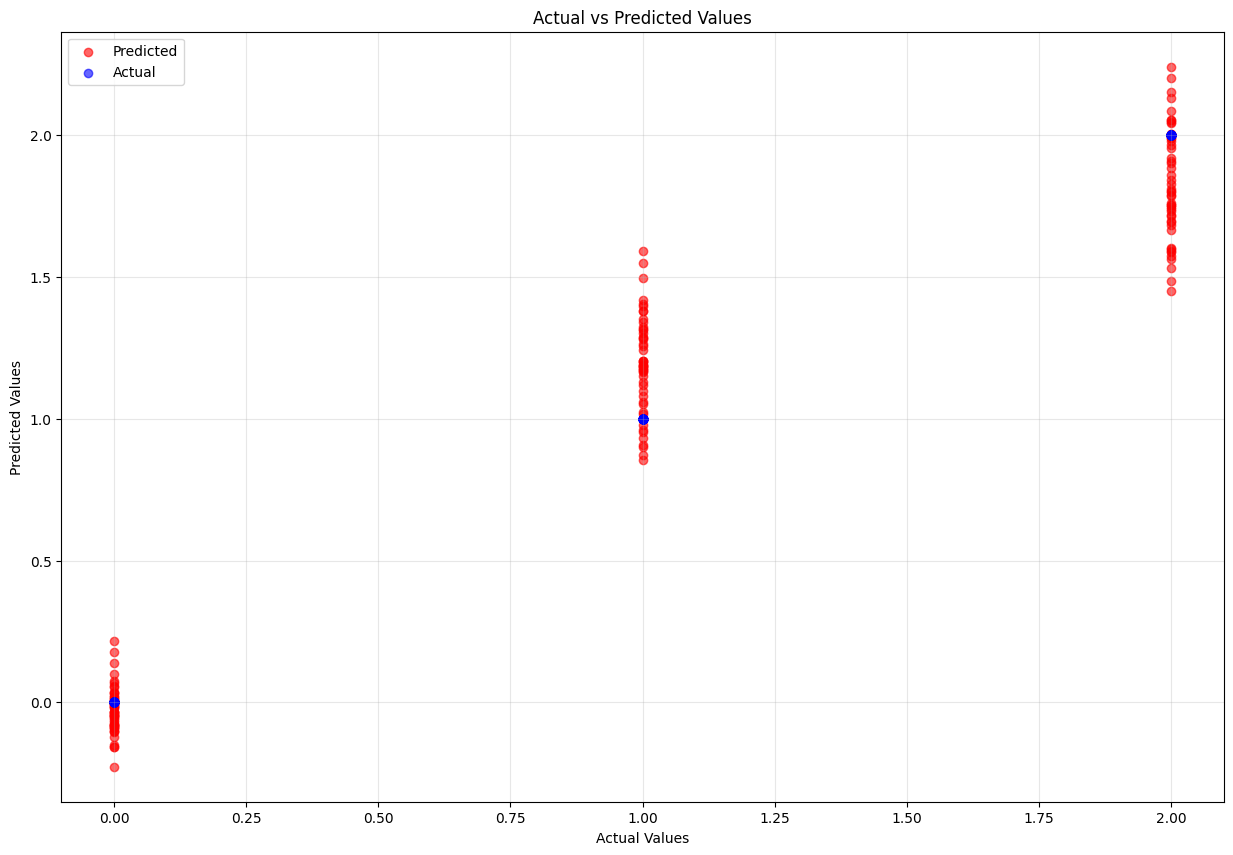

'\nIt is worth noting here that linear regression is not the best approach for this dataset.\nThis dataset is fundamentally suited toward classification, given there are three discrete categories (0, 1, 2).\n'

In [156]:
# YOUR CODE HERE

model = sklearn.linear_model.LinearRegression()

model.fit(df_input, df_output)

predictions = model.predict(df_input)

mean_squared_error = np.mean((df_output - predictions)**2)
print(f"Mean Squared Error: {mean_squared_error}")

plt.figure(figsize=(15, 10))
plt.scatter(df_output, predictions, alpha=0.6, color='red', label='Predicted')
plt.scatter(df_output, df_output, alpha=0.6, color='blue', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.grid(True, alpha=0.3)
plt.show()

# Notes #
"""
It is worth noting here that linear regression is not the best approach for this dataset.
This dataset is fundamentally suited toward classification, given there are three discrete categories (0, 1, 2).
"""

YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


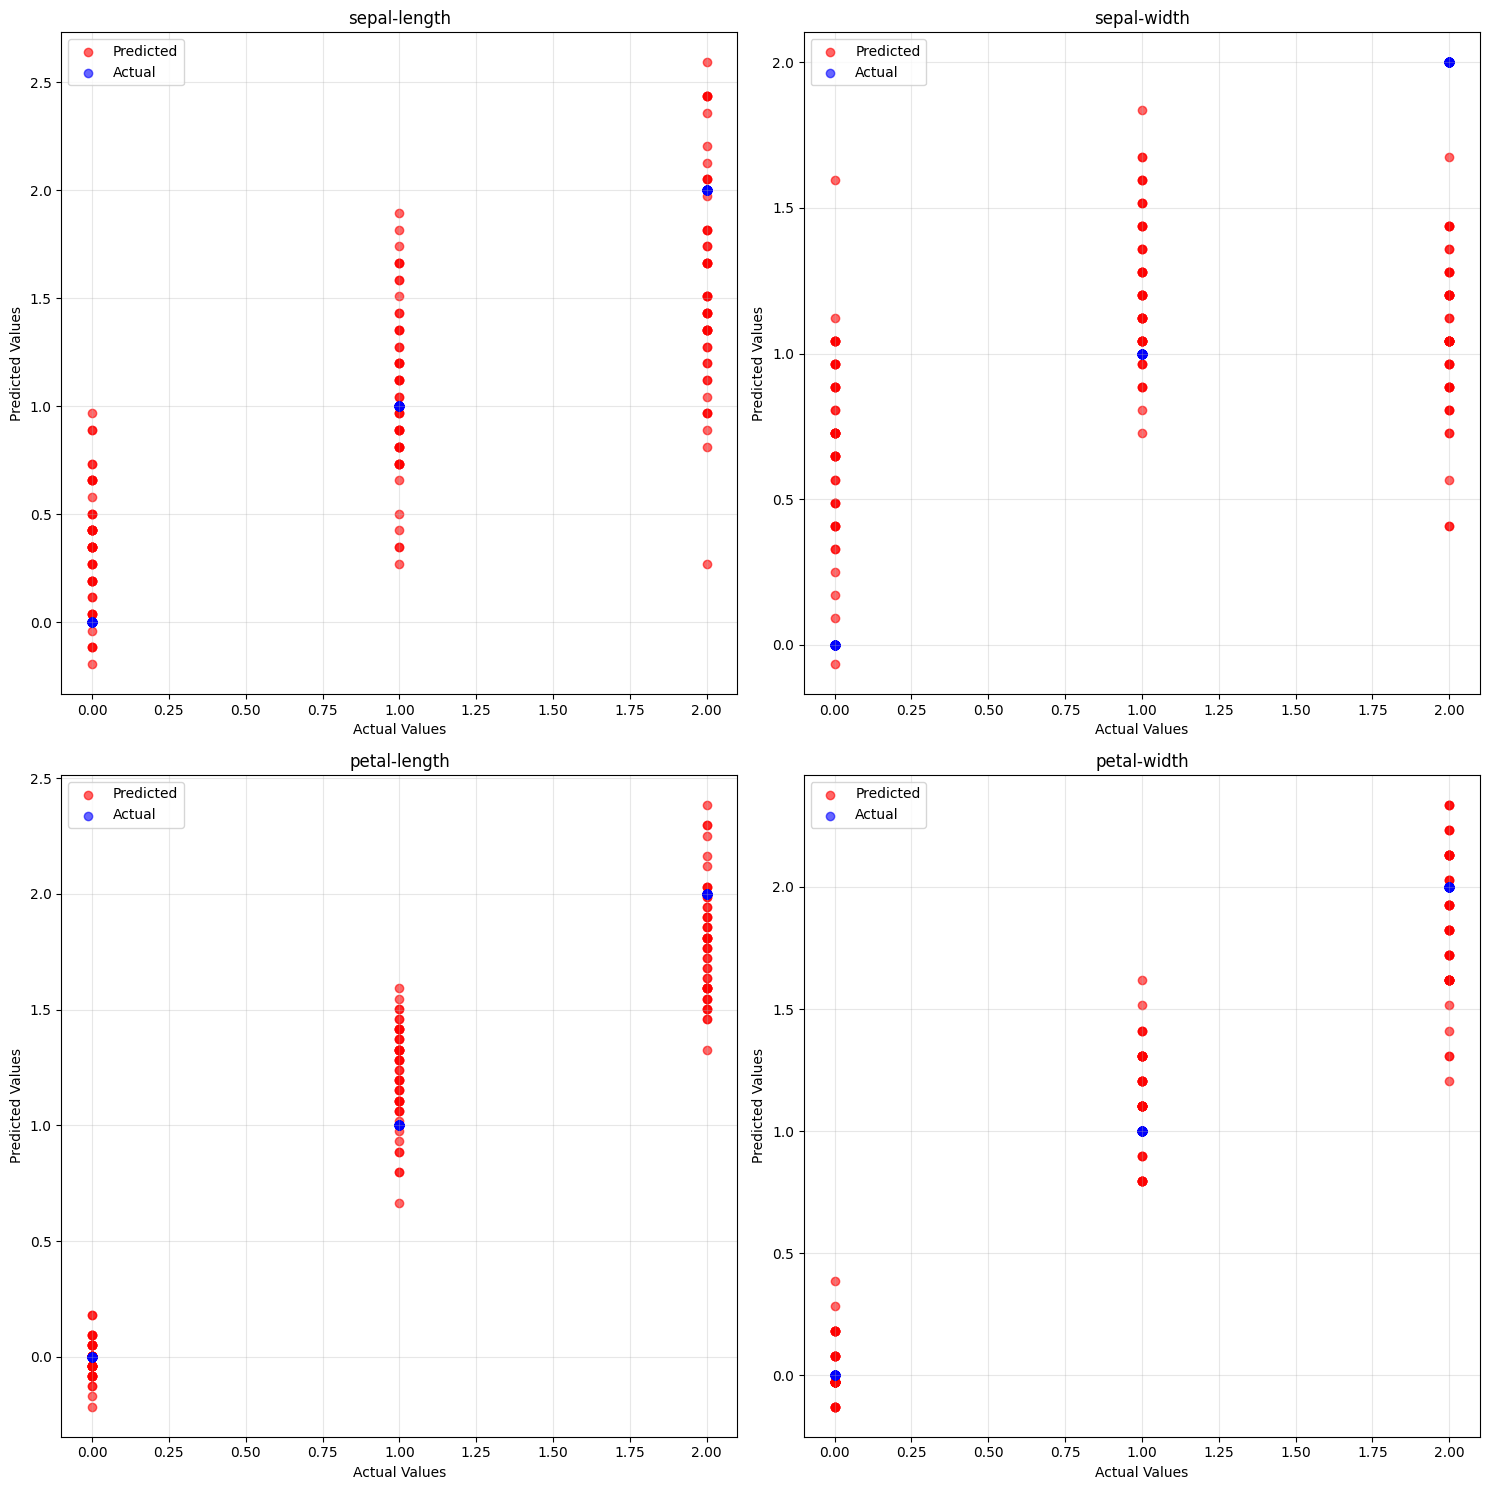

{'petal-width': np.float64(0.056784635839192354), 'petal-length': np.float64(0.06621216537347081), 'sepal-length': np.float64(0.25839861231192535), 'sepal-width': np.float64(0.5493765900582834)}


'\nThe input column that returns the best solo results is petal-width with an\nMSE of ~0.057. From my analysis in problem 4, I would have thought petal-length\nwould produce the best results, but it is clear why sepal-length and sepal-width\nperformed so poorly.\n\nThis is a worse result than the model built using all the input columns\nwhich has an MSE of ~0.046.\n'

In [157]:
# YOUR CODE HERE
col_names = df_input.columns

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

results = {}
for index, col_name in enumerate(col_names):
    model = sklearn.linear_model.LinearRegression()
    
    X = df_input[[col_name]]
    
    model.fit(X, df_output)
    predictions_single_col = model.predict(X)
    
    mse = np.mean((df_output - predictions_single_col)**2)
    results[col_name] = mse
    
    ax = axes[index]
    ax.scatter(df_output, predictions_single_col, alpha=0.6, color='red', label='Predicted')
    ax.scatter(df_output, df_output, alpha=0.6, color='blue', label='Actual')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()
    ax.set_title(f'{col_name}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

sorted_results = dict(sorted(results.items(), key=lambda x: x[1]))

print(sorted_results)

# Notes #
"""
The input column that returns the best solo results is petal-width with an
MSE of ~0.057. From my analysis in problem 4, I would have thought petal-length
would produce the best results, but it is clear why sepal-length and sepal-width
performed so poorly.

This is a worse result than the model built using all the input columns
which has an MSE of ~0.046.
"""

YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

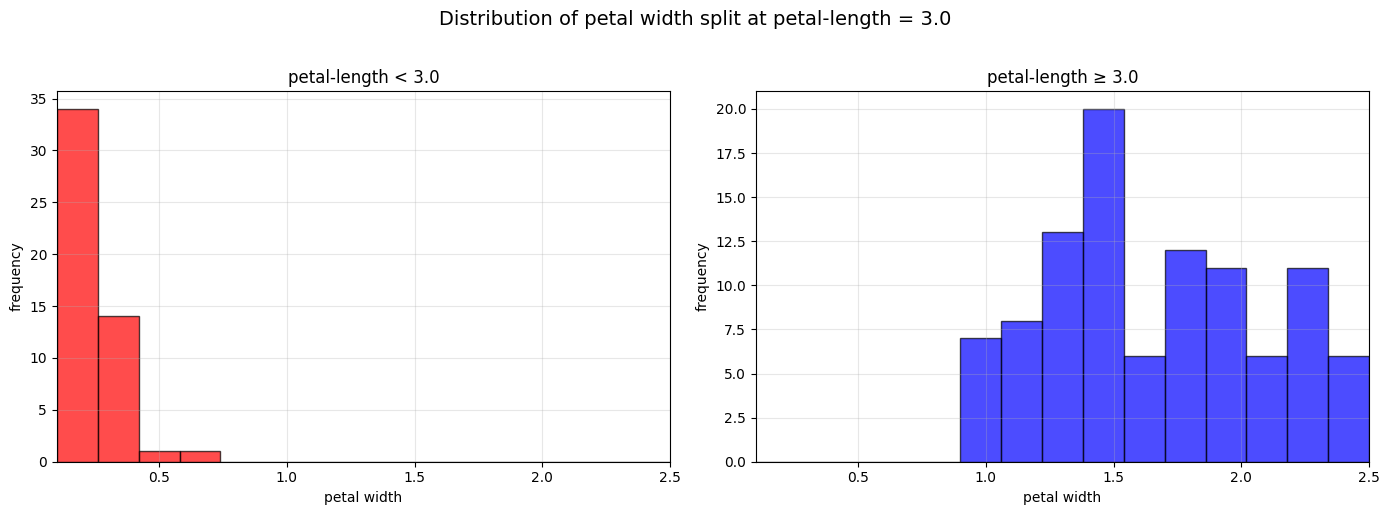

In [158]:
# YOUR CODE HERE

# Identifying columns with a visible dependency: petal-length and petal-width #
"""
plt.scatter(df['petal-length'], df['petal-width'])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('petal length vs petal width')
plt.tight_layout
plt.show
"""
"""
The above code shows how i inspected the input columns
"""

threshold = 3.0

below_threshold = df[df['petal-length'] < threshold]['petal-width']
above_threshold = df[df['petal-length'] >= threshold]['petal-width']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x_min = df['petal-width'].min()
x_max = df['petal-width'].max()

axes[0].hist(below_threshold, bins=15, color='red', edgecolor='black', alpha=0.7, range=(x_min, x_max))
axes[0].set_xlabel('petal width')
axes[0].set_ylabel('frequency')
axes[0].set_title(f'petal-length < {threshold}')
axes[0].set_xlim(x_min, x_max)
axes[0].grid(True, alpha=0.3)

axes[1].hist(above_threshold, bins=15, color='blue', edgecolor='black', alpha=0.7, range=(x_min, x_max))
axes[1].set_xlabel('petal width')
axes[1].set_ylabel('frequency')
axes[1].set_title(f'petal-length ≥ {threshold}')
axes[1].set_xlim(x_min, x_max)
axes[1].grid(True, alpha=0.3)

plt.suptitle(f'Distribution of petal width split at petal-length = {threshold}', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

Data variation explained by first half of the principal components: 97.8%
MSE (from first-half PCA): 0.061
MSE (from complete linear model): 0.046


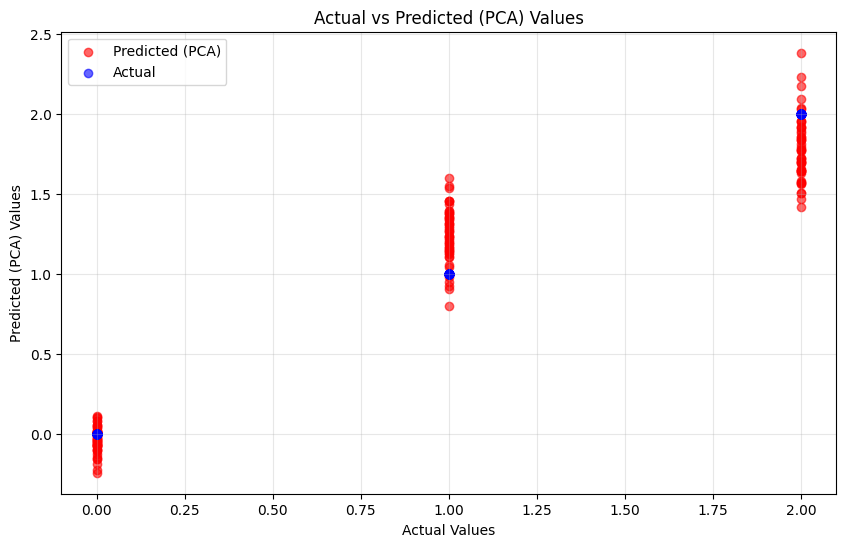

In [159]:
# YOUR CODE HERE

#df_input_normalized = df_input / df_input.std()
#df_input_normalized = (df_input - df_input.mean()) / df_input.std()
#scaler = StandardScaler()
#df_input_normalized = scaler.fit_transform(df_input)

# Normalization Notes #
"""
I originally attempted normalizing the input columns using the above methods,
but I found that each produced poorer results than just using the inputs as they were.
"""

iris_pca = PCA()
iris_pca.fit(df_input)

n_components = iris_pca.n_components_
n_components_first_half = n_components // 2

explained_variance_half = iris_pca.explained_variance_ratio_[:n_components_first_half].sum()
print(f"Data variation explained by first half of the principal components: {(explained_variance_half * 100):.1f}%") # ~95.8 %

pca_input = iris_pca.transform(df_input)[:, :n_components_first_half]

pca_model = sklearn.linear_model.LinearRegression()
pca_model.fit(pca_input, df_output)

pca_predictions = pca_model.predict(pca_input)

pca_mse = np.mean((df_output - pca_predictions)**2)
print(f"MSE (from first-half PCA): {pca_mse:.3f}\nMSE (from complete linear model): {mean_squared_error:.3f}")

plt.figure(figsize=(10, 6))
plt.scatter(df_output, pca_predictions, alpha=0.6, color='red', label='Predicted (PCA)')
plt.scatter(df_output, df_output, alpha=0.6, color='blue', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted (PCA) Values')
plt.legend()
plt.title('Actual vs Predicted (PCA) Values')
plt.grid(True, alpha=0.3)
plt.show()

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

              sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000    -0.109369      0.871754     0.817954
sepal-width      -0.109369     1.000000     -0.420516    -0.356544
petal-length      0.871754    -0.420516      1.000000     0.962757
petal-width       0.817954    -0.356544      0.962757     1.000000


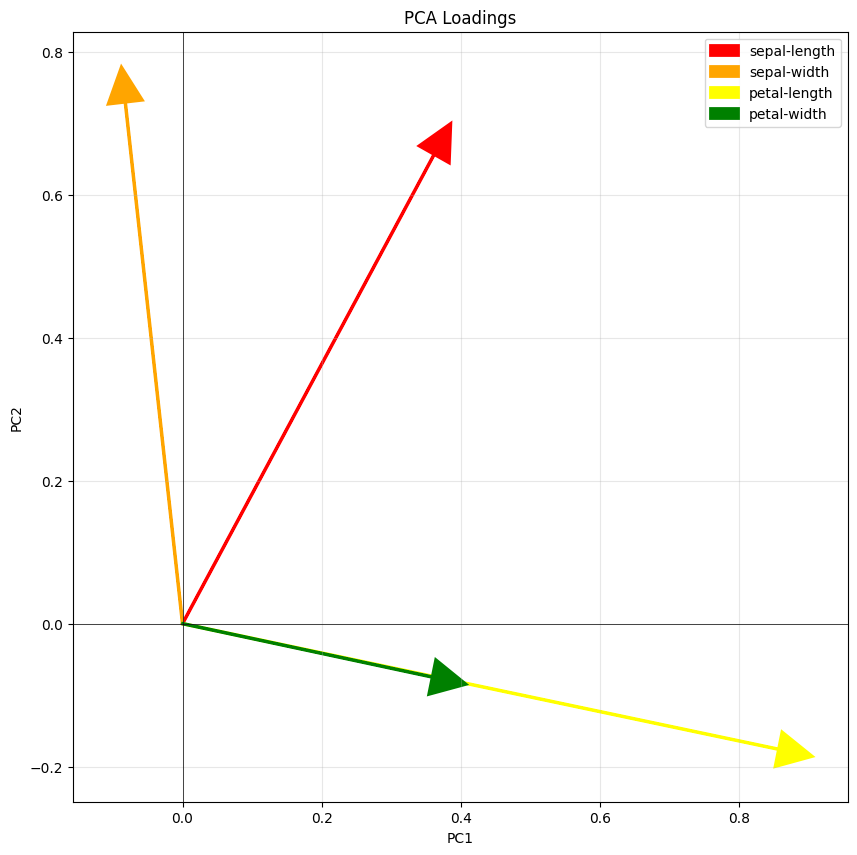

'\nCreating a biplot showing the PCA loadings using the first two principal components,\nshows that petal-length and petal-width point in the same direction. This tracks\nwith the findings from our correlation matrix showing that these two are strongly\ncorrelated.\n'

In [162]:
# YOUR CODE HERE

correlation_matrix = df_input.corr()
print(correlation_matrix)

# Correlation #
"""
The highest correlation between two input columns, as demonstrated in the correlation matrix,
is the correlation between petal-length and petal-width with a correlation value of ~0.96.
"""

pc1_loadings = iris_pca.components_[0]
pc2_loadings = iris_pca.components_[1]

plt.figure(figsize=(10, 10))

colors = ['red', 'orange', 'yellow', 'green']

for i, feature in enumerate(df_input.columns):
    plt.arrow(0, 0, pc1_loadings[i], pc2_loadings[i], 
              head_width=0.05, head_length=0.05, 
              fc=colors[i], ec=colors[i], 
              label=feature, linewidth=2)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Loadings')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Reflected in PCA #
"""
Creating a biplot showing the PCA loadings using the first two principal components,
shows that petal-length and petal-width point in the same direction. This tracks
with the findings from our correlation matrix showing that these two are strongly
correlated.
"""

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

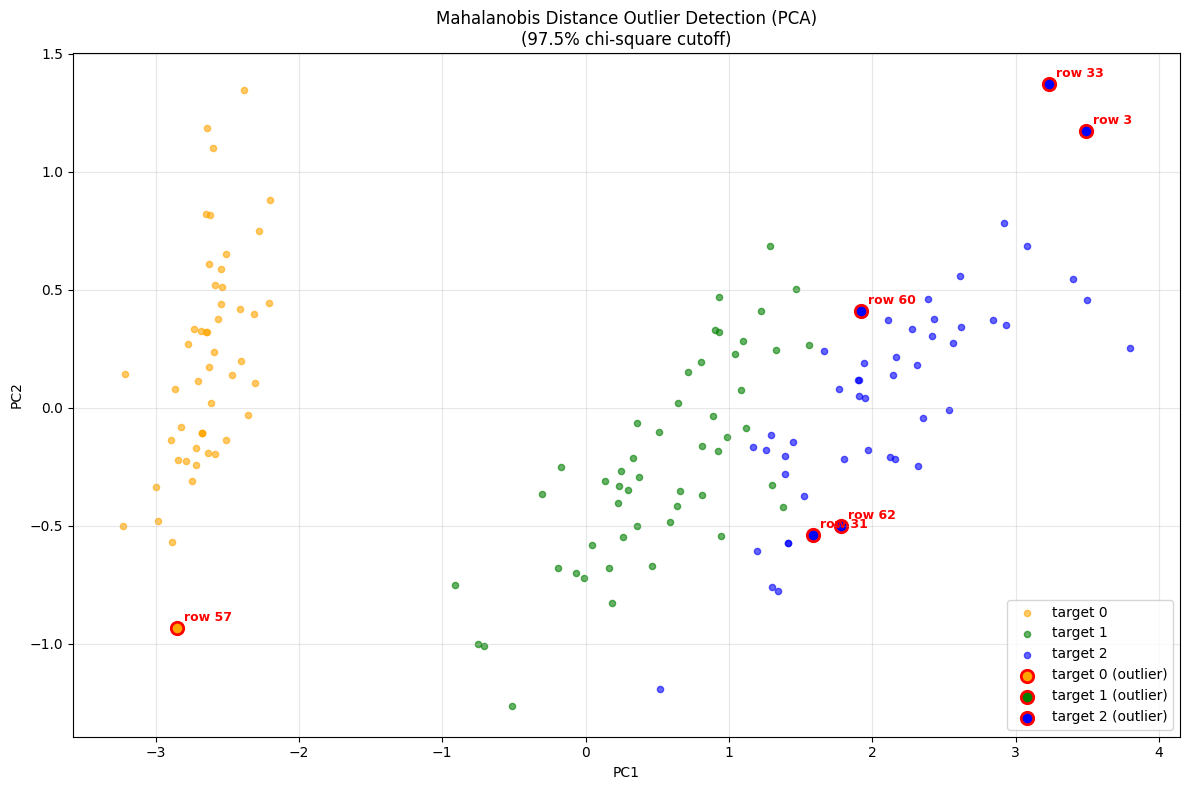

        sepal-length  sepal-width  petal-length  petal-width
target                                                      
0              5.006        3.418         1.464        0.244
1              5.936        2.770         4.260        1.326
2              6.588        2.974         5.552        2.026
---------
Row 57 analysis:
sepal-length    4.5
sepal-width     2.3
petal-length    1.3
petal-width     0.3
Name: 57, dtype: float64
---------
Minimum sepal-width row
sepal-length    4.5
sepal-width     2.3
petal-length    1.3
petal-width     0.3
target          0.0
Name: 57, dtype: float64


'\nThe row I am choosing to designate as an outlier is row 57.\n\nTo identify this row, I plotted Mahalanobis Distance using the first two\nprincipal components. I used a 97.5% chi-square cutoff to identify outliers.\nThis returned 6 rows and I decided to focus in on row 57.\n\nTo analyze this result, I first grouped the dataframe by target and got the \naverage values for each target. I next looked at the values for row 57. \nWhat I saw was an abnormally small sepal-length and sepal-width. to verify this result, \nI returned the smallest sepal-width row with target 0 and found they were the same row.\n\nThe reason why some outliers looks to be clumped in with the data and not outliers at\nall is because I am visually representing only the first two principal components, while the\nMahalanobis distance is calculated using all features. I chose row 57 because\nit was clearly identifiable as an outlier using these two axes which corresponds to the resulting\nabnormal sepal traits.\n'

In [161]:
# YOUR CODE HERE

mu = df_input.mean().values
sigma = df_input.cov().values
sigma_inv = np.linalg.inv(sigma)

diff = df_input.values - mu

mahalanobis_distances_squared = np.sum(diff @ sigma_inv * diff, axis=1)

p = df_input.shape[1]
cutoff = scipy.stats.chi2.ppf(0.975, df=p)

outliers = mahalanobis_distances_squared > cutoff

pca_input_full = iris_pca.transform(df_input)

plt.figure(figsize=(12, 8))

targets = df_output.values

colors = ['orange', 'green', 'blue']
target_names = ['target 0', 'target 1', 'target 2']

for i in range(3):
    mask = (~outliers) & (targets == i)
    plt.scatter(pca_input_full[mask, 0], pca_input_full[mask, 1],
                c=colors[i], alpha=0.6, s=20, label=target_names[i])

for j in range(3):
    mask = outliers & (targets == j)
    plt.scatter(pca_input_full[mask, 0], pca_input_full[mask, 1],
                c=colors[j], edgecolors='red', linewidths=2, 
                s=80, marker='o', label=f'{target_names[j]} (outlier)')

outlier_indices = np.where(outliers)[0]
for k in outlier_indices:
    plt.annotate("row " + str(k), 
                xy=(pca_input_full[k, 0], pca_input_full[k, 1]),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=9,
                color='red',
                fontweight='bold')

plt.xlabel(f"PC1")
plt.ylabel(f"PC2")
plt.title("Mahalanobis Distance Outlier Detection (PCA)\n(97.5% chi-square cutoff)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

df_averages = df.groupby('target')[df_input.columns].mean()
print(df_averages)
print('---------')
print('Row 57 analysis:')
print(df_input.iloc[57])
print('---------')
print('Minimum sepal-width row')
min_sepal_width_index = df[df['target'] == 0]['sepal-width'].idxmin()
print(df.iloc[min_sepal_width_index])

# Outlier Analysis #
"""
The row I am choosing to designate as an outlier is row 57.

To identify this row, I plotted Mahalanobis Distance using the first two
principal components. I used a 97.5% chi-square cutoff to identify outliers.
This returned 6 rows and I decided to focus in on row 57.

To analyze this result, I first grouped the dataframe by target and got the 
average values for each target. I next looked at the values for row 57. 
What I saw was an abnormally small sepal-length and sepal-width. to verify this result, 
I returned the smallest sepal-width row with target 0 and found they were the same row.

The reason why some outliers looks to be clumped in with the data and not outliers at
all is because I am visually representing only the first two principal components, while the
Mahalanobis distance is calculated using all features. I chose row 57 because
it was clearly identifiable as an outlier using these two axes which corresponds to the resulting
abnormal sepal traits.
"""

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE